In [2]:
#Require library loading
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
#Data Acquisition
Con_data = pd.read_csv("D:/MLDS with Python/Video/CL-30_RandomForest/concrete_data.csv")
Con_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
#Data pre-Processing
Con_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
#Check the shape
Con_data.shape

(1030, 9)

In [7]:
# Describe statistics
Con_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
#Create correlation matrix
Con_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

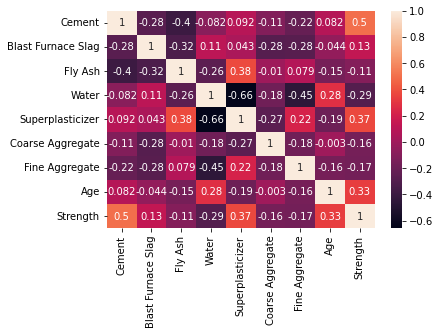

In [10]:
#Generating correlation heatmap for better understanding
sns.heatmap(Con_data.corr(), annot=True)

In [11]:
#Feature Engineerint
feature = Con_data[['Cement', 'Superplasticizer','Age','Strength']]
feature.corr()

,Cement,Superplasticizer,Age,Strength
Cement,1.000000,0.092386,0.081946,0.497832
Superplasticizer,0.092386,1.000000,-0.192700,0.366079
Age,0.081946,-0.192700,1.000000,0.328873
Strength,0.497832,0.366079,0.328873,1.000000


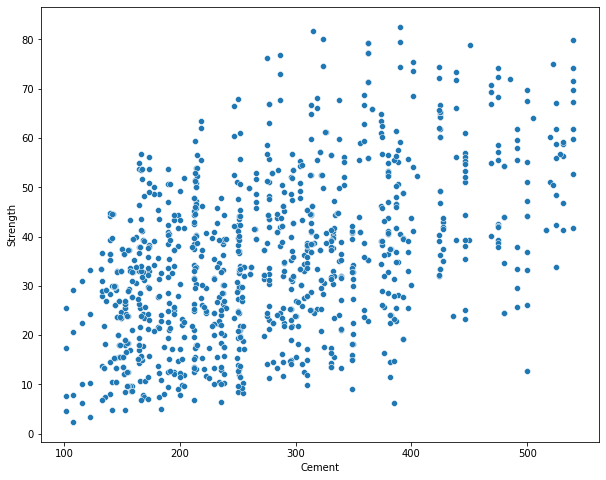

In [14]:
#Explotary data analysis
plt.figure(figsize=(10,8))
sns.scatterplot(x="Cement", y="Strength", data=Con_data)
plt.show()

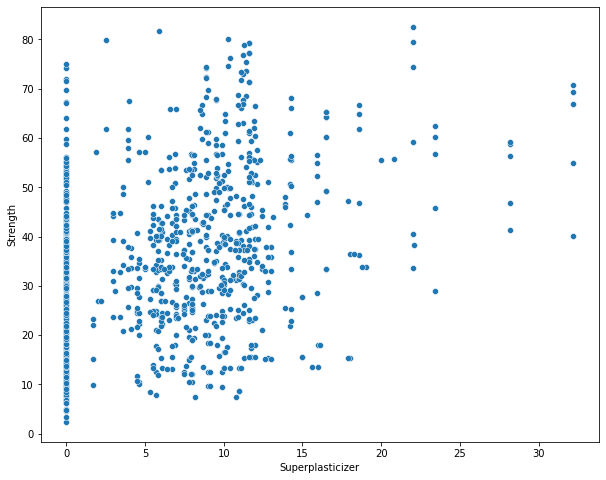

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Superplasticizer", y="Strength", data=Con_data)
plt.show()

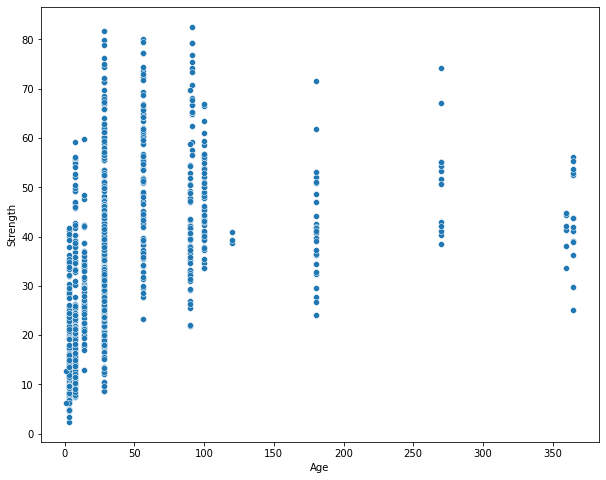

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Age", y="Strength", data=Con_data)
plt.show()

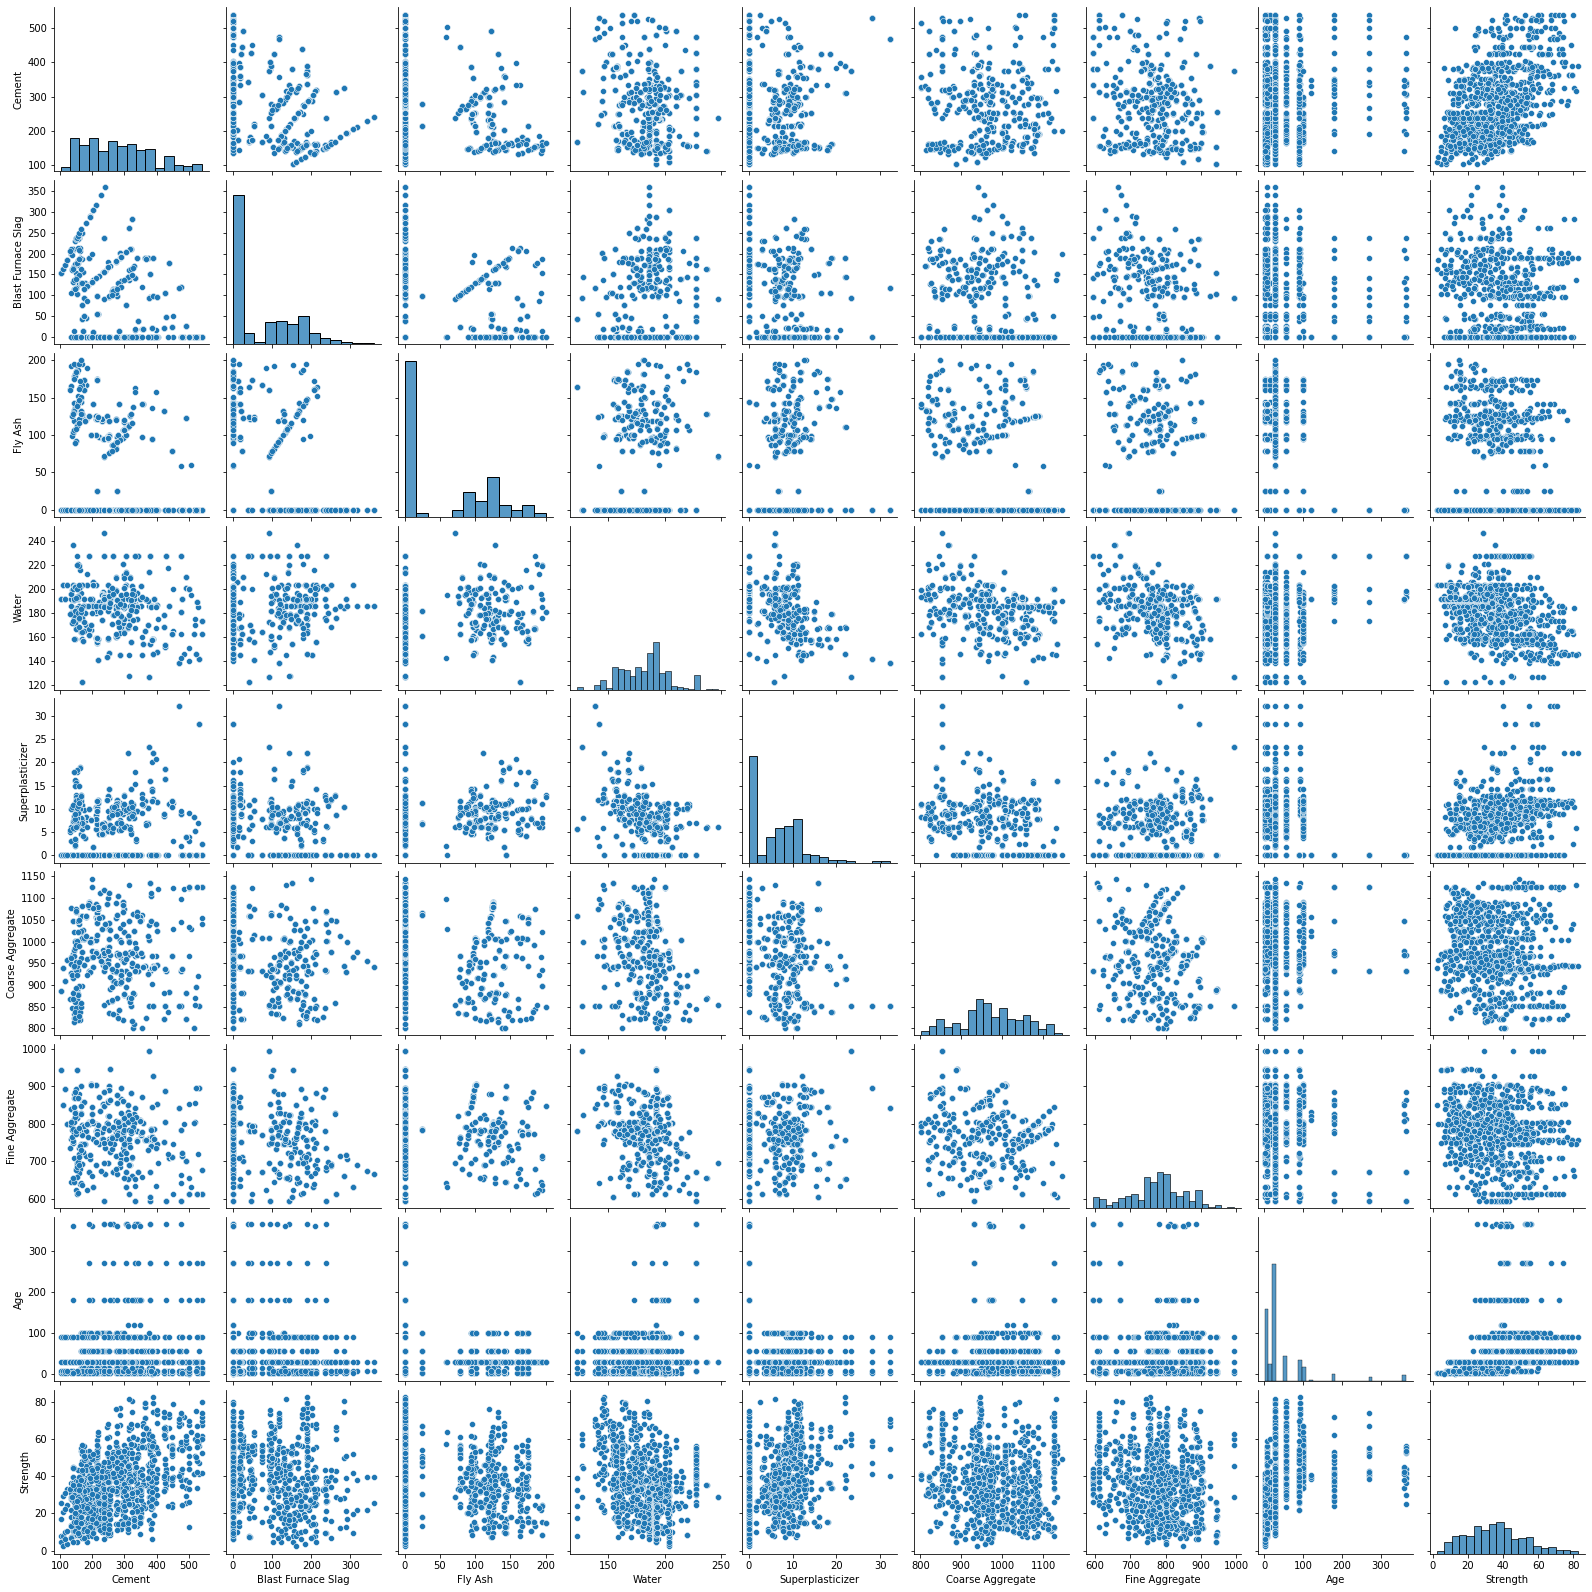

In [12]:
#pairplot
sns.pairplot(Con_data)

In [17]:
#Split train and test data
x=feature[['Cement']]
y=feature[['Strength']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((824, 1), (206, 1), (824, 1), (206, 1))

In [19]:
#Fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
#Checking model parameter(intercept)
model.intercept_

array([13.83554655])

In [21]:
#coefficient
model.coef_

array([[0.07879404]])

In [23]:
# Test prediction
ypred=model.predict(X_test)
X_test.values[0], Y_test.values[0], ypred[0]

(array([139.6]), array([44.7]), array([24.83519438]))